In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import seaborn as sns
import plotly.express as px
%matplotlib inline

- plotly version 5.9.0

In [2]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__)

5.9.0


In [3]:
import cufflinks as cf

In [4]:
init_notebook_mode(connected=True)
cf.go_offline()

In [5]:
import plotly.graph_objects as go

In [6]:
sns.set_style("whitegrid")

In [7]:
df = pd.read_csv("911.csv")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [9]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


### Top 5 zip codes for 911 calls:

In [10]:
df.value_counts("zip").nlargest(5)

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
dtype: int64

### Top 5 townships for 911 calls:

In [11]:
df.value_counts("twp").nlargest(5)

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
dtype: int64

### Unique title codes:

In [12]:
df["title"].nunique()

110

In [13]:
df["reason"] = df["title"].apply(lambda x: x.split(":")[0])

In [14]:
df.head(1)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS


### Most common reason for 911 call:

In [15]:
df.value_counts("reason").nlargest(5)

reason
EMS        48877
Traffic    35695
Fire       14920
dtype: int64

<Axes: xlabel='reason', ylabel='count'>

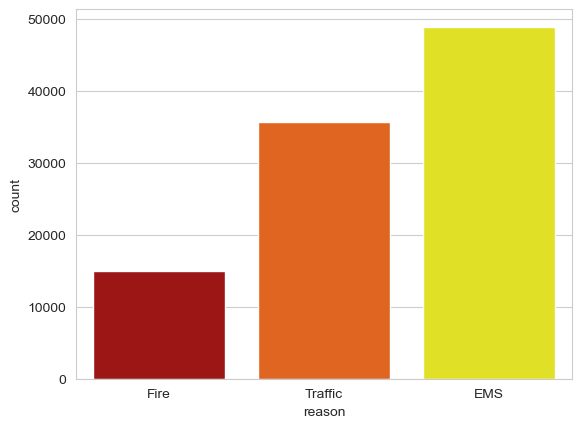

In [16]:
sns.countplot(df, x="reason", order = df["reason"].value_counts(ascending=True).index, palette = "hot")

In [17]:
print(df.dtypes["timeStamp"])

object


In [18]:
df["timeStamp"] = pd.to_datetime(df["timeStamp"])

In [19]:
print(df.dtypes["timeStamp"])

datetime64[ns]


In [20]:
time = df["timeStamp"].iloc[0]
time.hour

17

In [21]:
df["hour"] = df["timeStamp"].apply(lambda x: x.hour)
df["month"] = df["timeStamp"].apply(lambda x: x.month)
df["day"] = df["timeStamp"].apply(lambda x: x.dayofweek)

In [22]:
df.head(1)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3


In [23]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [24]:
df["day"] = df["day"].map(dmap)

In [25]:
df.head(1)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu


<Axes: xlabel='reason', ylabel='hour'>

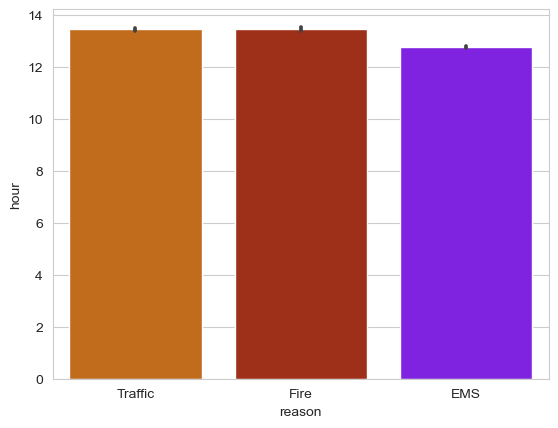

In [26]:
sns.barplot(x='reason',y='hour', data=df,palette='gnuplot_r',order=['Traffic','Fire','EMS'])

<Axes: xlabel='reason', ylabel='hour'>

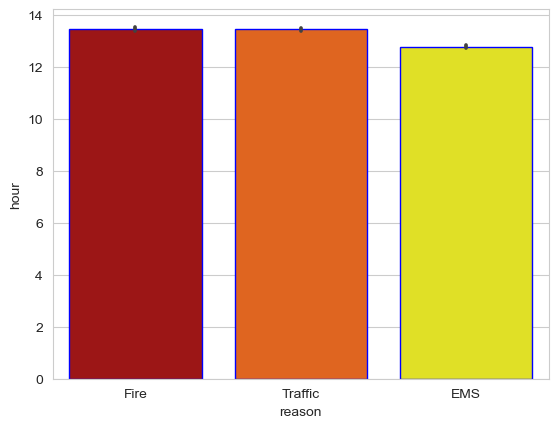

In [27]:
sns.barplot(data= df,
         x='reason', 
         y='hour',
        order=['Fire','Traffic','EMS'], 
           palette = "hot", 
           edgecolor = "blue")

<Axes: xlabel='day', ylabel='count'>

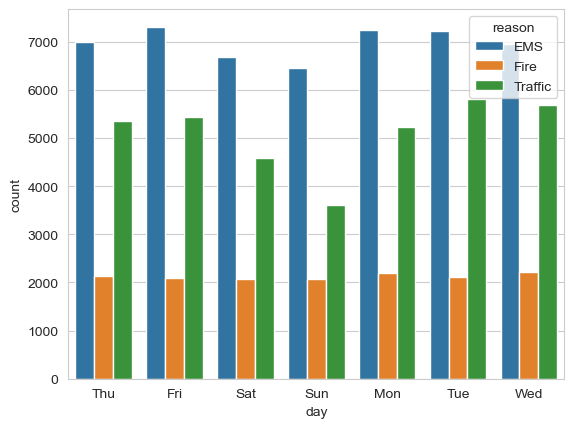

In [28]:
sns.countplot(data=df, x = "day", hue="reason")

<Axes: xlabel='month', ylabel='count'>

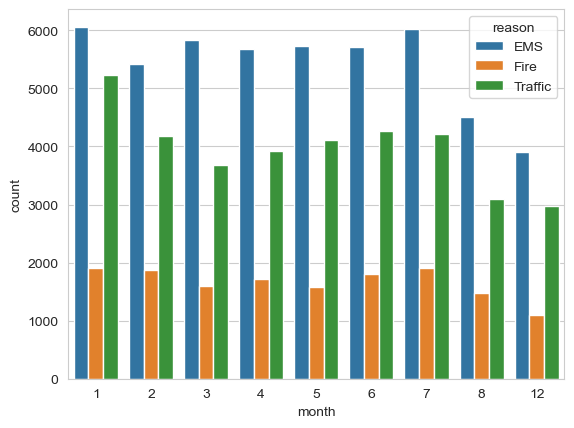

In [29]:
sns.countplot(data=df, x = "month", hue="reason")

In [30]:
byMonth = df.groupby("month").count()

In [31]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,day
month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


In [32]:
byMonth.reset_index(inplace = True)

In [33]:
byMonth["twp"].iplot()

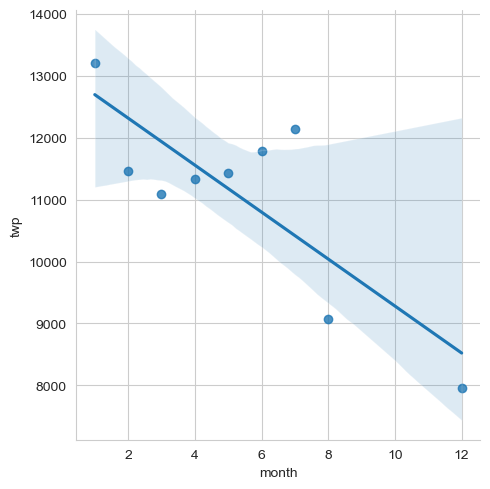

In [34]:
sns.lmplot(x="month", y="twp", data = byMonth)

In [35]:
df["date"] = df["timeStamp"].apply(lambda x: x.date())

In [36]:
df.groupby("date").count()["twp"].iplot()
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [37]:
df["EMS"] = df[df["reason"] == "EMS"]["date"]
df["Traffic"] = df[df["reason"] == "Traffic"]["date"]
df["Fire"] = df[df["reason"] == "Fire"]["date"]

In [38]:
df.groupby("date").count()["EMS"].iplot()
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [39]:
df.groupby("date").count()["Traffic"].iplot()
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [40]:
df.groupby("date").count()["Fire"].iplot()
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [42]:
day_hour = df.groupby(["day", "hour"]).count().unstack()["reason"]
day_hour.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


In [44]:
fig = px.imshow(day_hour)
fig.show()

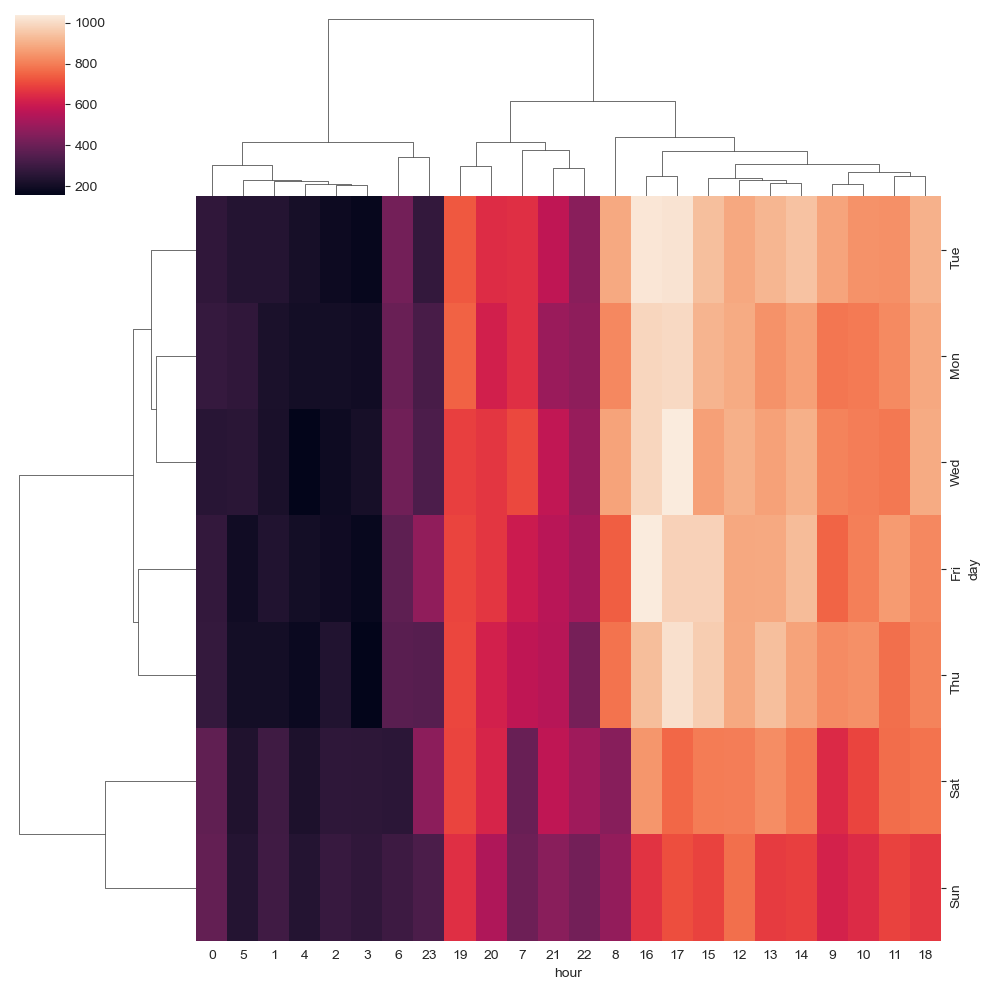

In [45]:
sns.clustermap(day_hour)

In [46]:
day_month = df.groupby(["day", "month"]).count().unstack()["reason"]
day_month.head()

month,1,2,3,4,5,6,7,8,12
day,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


In [47]:
fig = px.imshow(day_month)
fig.show()

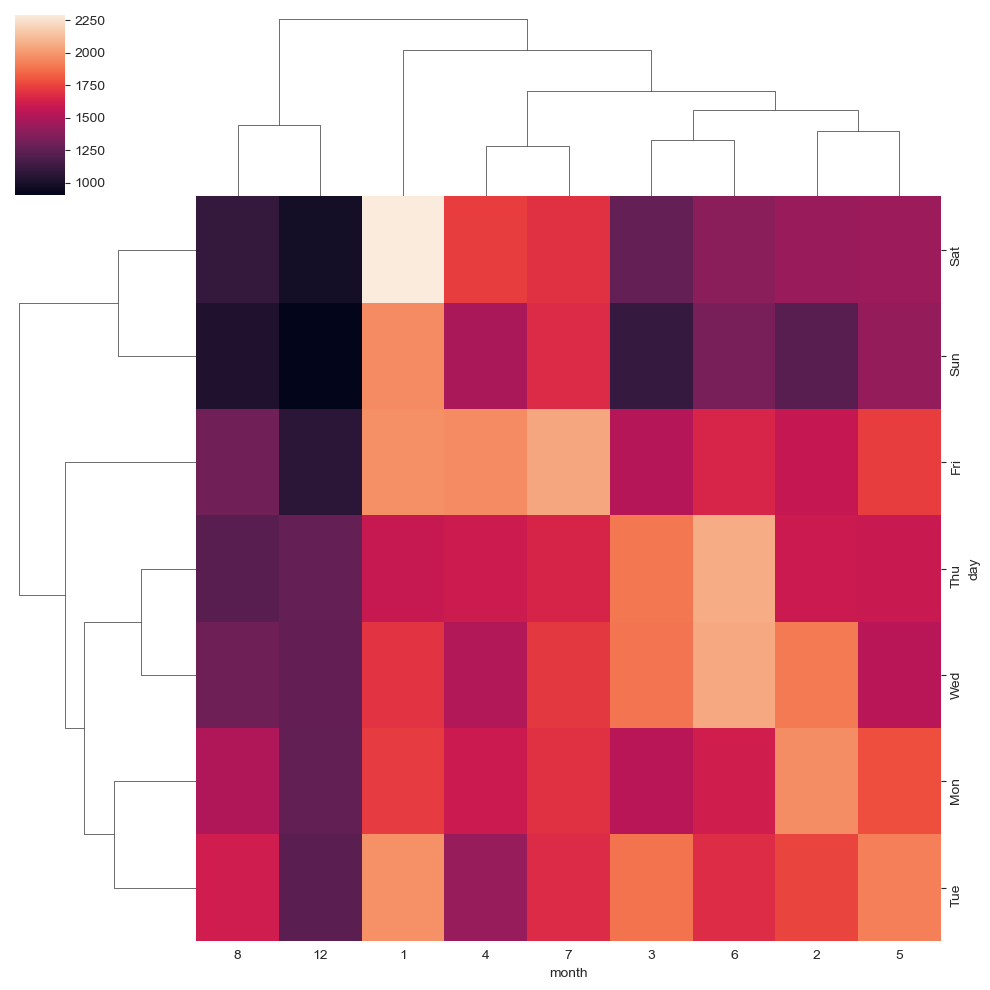

In [48]:
sns.clustermap(day_month)

In [ ]:
./